In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
largeRT = pd.read_csv('large_rt_sheet.csv')
print("We don't need anything from the smaller rotten tomatoes sheet because it doesn't have audience rating info") 

We don't need anything from the smaller rotten tomatoes sheet because it doesn't have audience rating info


In [7]:
oscars = pd.read_csv('oscar_noms_and_winners.csv')
oscarYears = oscars[oscars['year_ceremony']>1999]
actor = oscarYears[oscarYears['category']=='ACTOR IN A LEADING ROLE']
actress = oscarYears[oscarYears['category']=='ACTRESS IN A LEADING ROLE']
director = oscarYears[oscarYears['category']=='DIRECTING']
picture = oscarYears[oscarYears['category']=='BEST PICTURE']

In [8]:
lrtActor = pd.merge(largeRT, actor, how='inner', left_on='movie_title', right_on='film')
lrtActress = pd.merge(largeRT, actress, how='inner', left_on='movie_title', right_on='film')
lrtDirector = pd.merge(largeRT, director, how='inner', left_on='movie_title', right_on='film')
lrtPicture = pd.merge(largeRT, picture, how='inner', left_on='movie_title', right_on='film')
print(lrtActor.columns)

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'content_rating', 'genres', 'directors', 'authors',
       'actors', 'original_release_date', 'streaming_release_date', 'runtime',
       'production_company', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'tomatometer_top_critics_count',
       'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count',
       'year_film', 'year_ceremony', 'ceremony', 'category', 'name', 'film',
       'winner'],
      dtype='object')


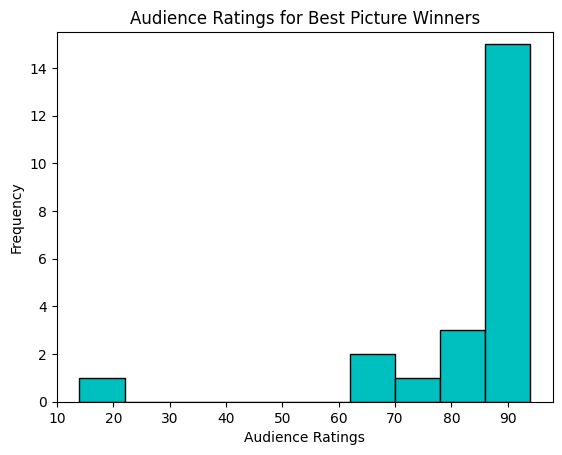

82.5909090909091


In [9]:
lrtPicWin = lrtPicture[lrtPicture['winner']==True]
audience = lrtPicWin['audience_rating']
plt.hist(audience, bins=10, edgecolor='black', color='c')
plt.ylim(0,15.5)
plt.xlabel('Audience Ratings')
plt.ylabel('Frequency')
plt.title('Audience Ratings for Best Picture Winners')
plt.show()
print(audience.mean())

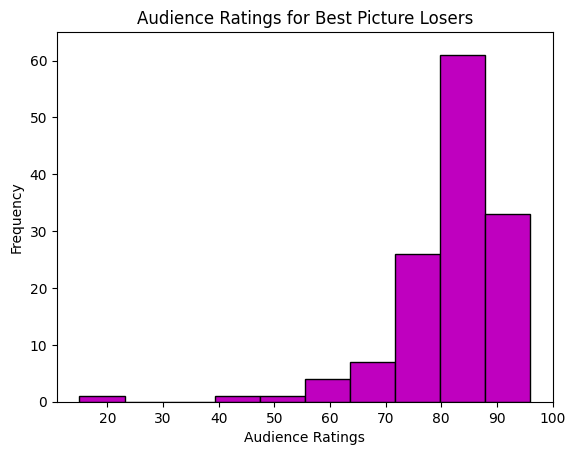

81.47014925373135


In [10]:
lrtPicLose = lrtPicture[lrtPicture['winner']==False]
audience = lrtPicLose['audience_rating']
plt.hist(audience, bins=10, edgecolor='black', color='m')
plt.ylim(0,65)
plt.xlabel('Audience Ratings')
plt.ylabel('Frequency')
plt.title('Audience Ratings for Best Picture Losers')
plt.show()
print(audience.mean())

82.5909090909091
3.667252466532146
81.47014925373135
0.8852771689495075


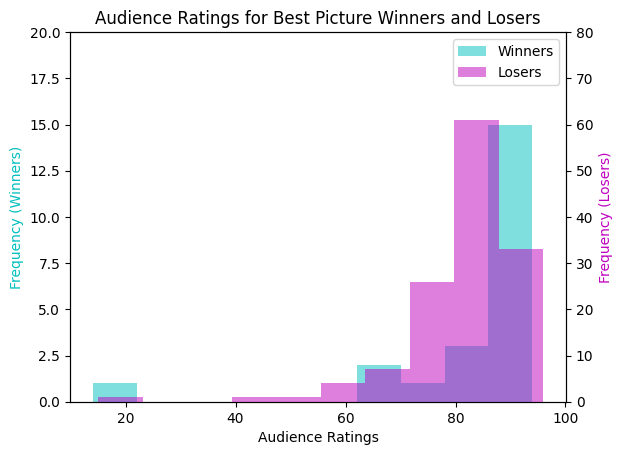

In [11]:
lrtPicWinA = lrtPicture[lrtPicture['winner']==True]
lrtPicLoseA = lrtPicture[lrtPicture['winner']==False]

audienceWinners = lrtPicWinA['audience_rating']
audienceLosers = lrtPicLoseA['audience_rating']
print(audienceWinners.mean())
print(audienceWinners.sem())
print(audienceLosers.mean())
print(audienceLosers.sem())

fig, ax = plt.subplots()
ax.hist(audienceWinners, bins=10, alpha=0.5, label='Winners', color='c')

ax.set_xlabel('Audience Ratings')
ax.set_ylabel('Frequency (Winners)', color='c')
ax.set_title('Audience Ratings for Best Picture Winners and Losers')
ax.set_ylim(0, 20) 

ax2 = ax.twinx()
ax2.hist(audienceLosers, bins=10, alpha=0.5, label='Losers', color='m')
ax2.set_ylabel('Frequency (Losers)', color='m')
ax2.set_ylim(0, 80)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')

plt.show()

In [12]:
from scipy import stats

lrtPicWinA = lrtPicture[lrtPicture['winner'] == True]['audience_rating']
lrtPicLoseA = lrtPicture[lrtPicture['winner'] == False]['audience_rating']

t, p = stats.ttest_ind(lrtPicWinA, lrtPicLoseA)
alpha = 0.05
print(p)
if p < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

0.6709902090854389
Fail to reject null hypothesis


In [13]:
audience = lrtPicture['audience_rating']
critic = lrtPicture['tomatometer_rating']

t2, p2 = stats.ttest_ind(audience, critic)
alpha = 0.05
print(p2)
if p2 < alpha:
    print("Reject null hypothesis")
else:
    print("Fail to reject null hypothesis")

0.01570087178412894
Reject null hypothesis
